In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../../../Lectures/Lecture 3/data/hw3.csv')

df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [3]:
df.sort_values(['token', 'ts'], inplace=True)
df['ts'] = pd.to_datetime(df['ts'])
df.reset_index(drop=True, inplace=True)

df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 23:00:00,245.542,245.986,244.668,NaN,465.868,NaN,"<span name=""tokenName"">AAVE</span>",ETH
1,2021-12-04 12:00:00,191.100,191.502,184.611,187.440,4854.272,NaN,"<span name=""tokenName"">AAVE</span>",ETH
2,2021-12-05 07:00:00,203.197,204.141,NaN,203.764,1483.325,NaN,"<span name=""tokenName"">AAVE</span>",ETH
3,2021-12-07 00:00:00,186.578,186.916,184.091,184.691,4172.479,NaN,"<span name=""tokenName"">AAVE</span>",ETH
4,2021-12-07 02:00:00,185.204,186.838,NaN,182.996,2527.875,NaN,"<span name=""tokenName"">AAVE</span>",ETH


# Look Total Condition

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         2667 non-null   datetime64[ns]
 1   open       2667 non-null   float64       
 2   high       2163 non-null   float64       
 3   low        2378 non-null   float64       
 4   close      2531 non-null   float64       
 5   volume     2667 non-null   float64       
 6   volumeUSD  0 non-null      float64       
 7   token      2667 non-null   object        
 8   chain      2667 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 187.6+ KB


# Drop duplicates

In [5]:
df.drop_duplicates(inplace=True)

df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 23:00:00,245.542,245.986,244.668,NaN,465.868,NaN,"<span name=""tokenName"">AAVE</span>",ETH
1,2021-12-04 12:00:00,191.100,191.502,184.611,187.440,4854.272,NaN,"<span name=""tokenName"">AAVE</span>",ETH
2,2021-12-05 07:00:00,203.197,204.141,NaN,203.764,1483.325,NaN,"<span name=""tokenName"">AAVE</span>",ETH
3,2021-12-07 00:00:00,186.578,186.916,184.091,184.691,4172.479,NaN,"<span name=""tokenName"">AAVE</span>",ETH
4,2021-12-07 02:00:00,185.204,186.838,NaN,182.996,2527.875,NaN,"<span name=""tokenName"">AAVE</span>",ETH


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         2360 non-null   datetime64[ns]
 1   open       2360 non-null   float64       
 2   high       1910 non-null   float64       
 3   low        2104 non-null   float64       
 4   close      2244 non-null   float64       
 5   volume     2360 non-null   float64       
 6   volumeUSD  0 non-null      float64       
 7   token      2360 non-null   object        
 8   chain      2360 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 184.4+ KB


# Format the token names

In [7]:
df['token'].unique()

array(['<span name="tokenName">AAVE</span>',
       '<span name="tokenName">BTC</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">USDT</span>', 'AAVE', 'BTC', 'COMP', 'CRV',
       'ETH', 'SOL', 'UNI', 'USDT'], dtype=object)

In [8]:
df.loc[df['token'].str.contains('span'), 'token'] = df.loc[df['token'].str.contains('span'), 'token'].str.extract('<span name="tokenName">(.*?)<\/span>').values 

df['token'].unique()

array(['AAVE', 'BTC', 'COMP', 'CRV', 'ETH', 'SOL', 'UNI', 'USDT'],
      dtype=object)

In [9]:
print(df['token'].value_counts())

print(df['token'].value_counts().sum() == df.shape[0])

AAVE    295
BTC     295
COMP    295
CRV     295
ETH     295
SOL     295
UNI     295
USDT    295
Name: token, dtype: int64
True


# Consider price outlier and Input missing prices

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ts         2360 non-null   datetime64[ns]
 1   open       2360 non-null   float64       
 2   high       1910 non-null   float64       
 3   low        2104 non-null   float64       
 4   close      2244 non-null   float64       
 5   volume     2360 non-null   float64       
 6   volumeUSD  0 non-null      float64       
 7   token      2360 non-null   object        
 8   chain      2360 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 184.4+ KB


Open price is complete and we could use its value to replace other missing value.

In [11]:
def plot_price_change(price_name):
    print("Look at the " + price_name + " price: ")
    tokens_in_df = df.token.unique()

    fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

    idx = 0
    for label, df_token in df[['token', price_name, 'ts']].groupby('token'):
        df_token.set_index('ts')[price_name].plot(ax=axes[idx // 2, idx % 2], label=label)
        axes[idx // 2, idx % 2].legend()
        idx += 1
    return 


Look at the close price: 


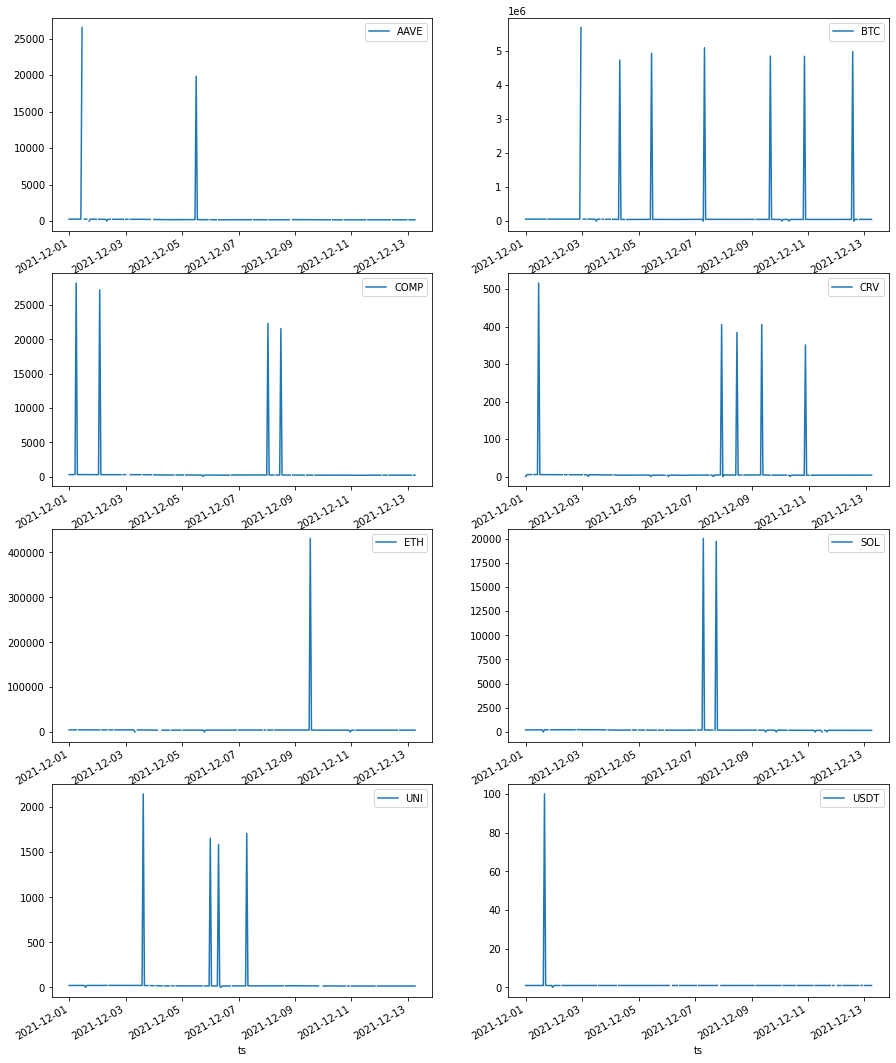

In [12]:
plot_price_change('close')

Look at the open price: 


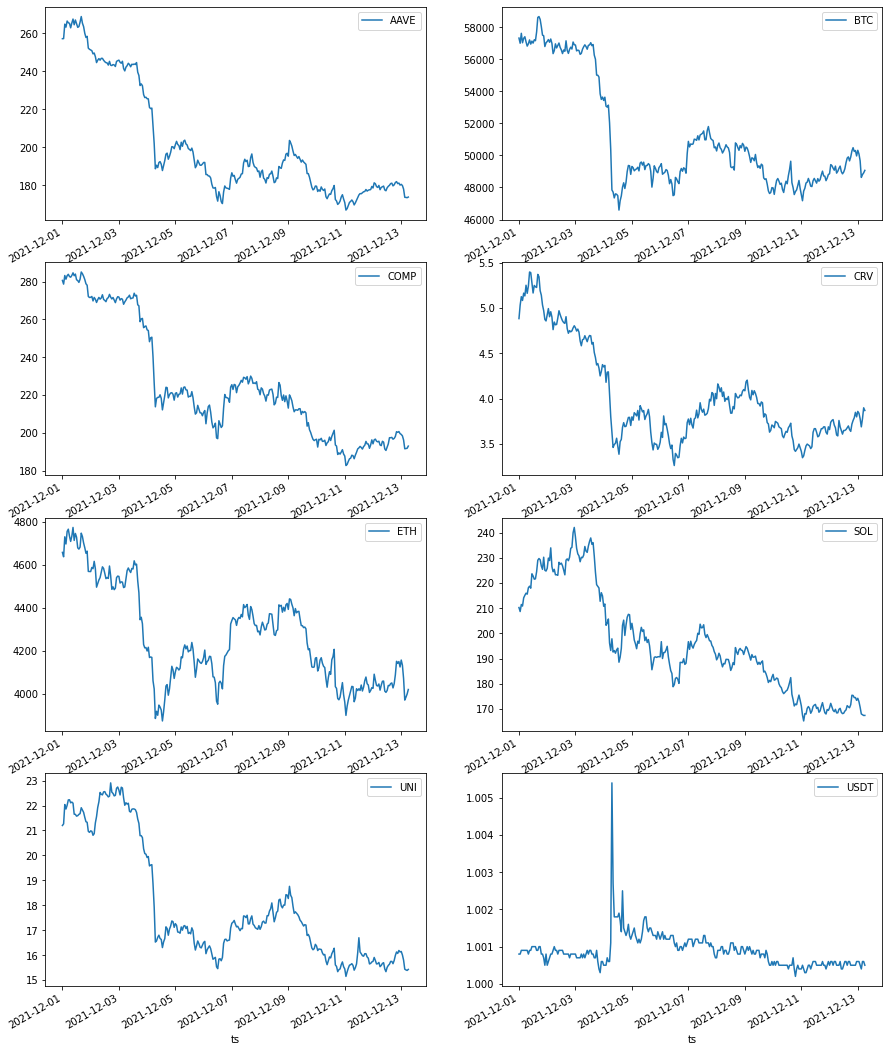

In [13]:
plot_price_change('open')

Look at the high price: 


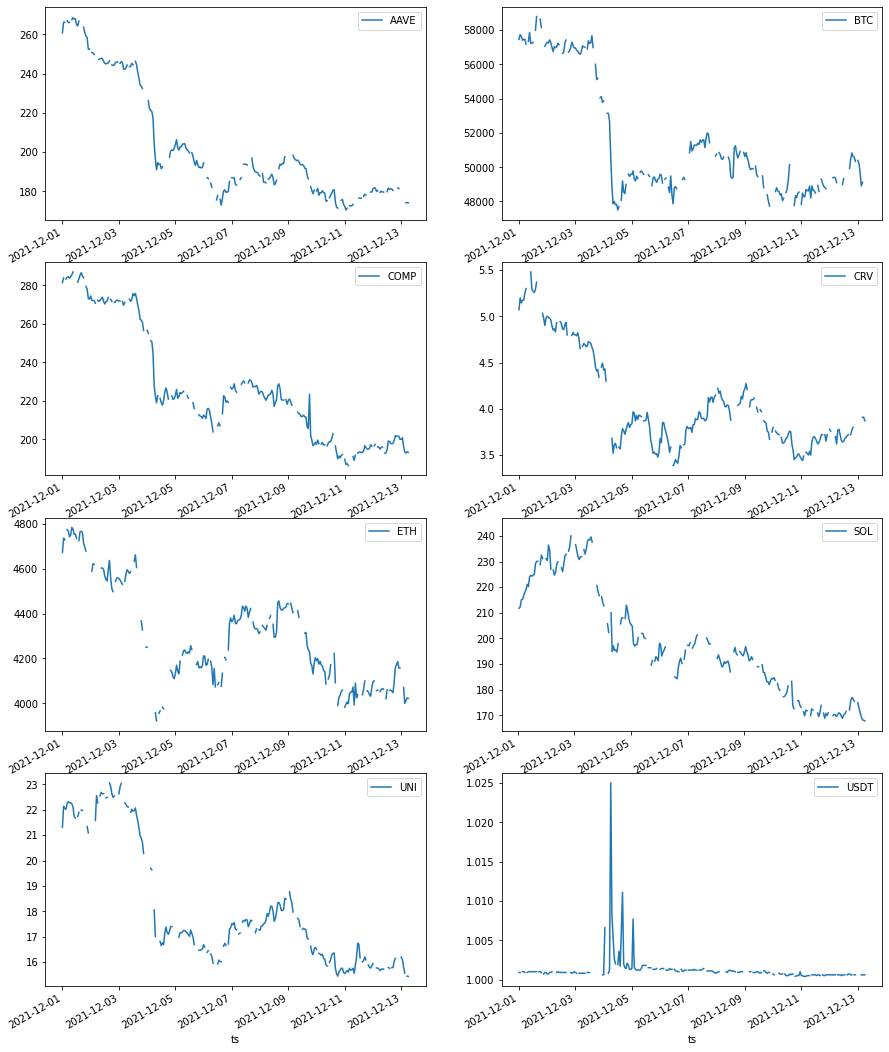

In [14]:
plot_price_change('high')

Look at the low price: 


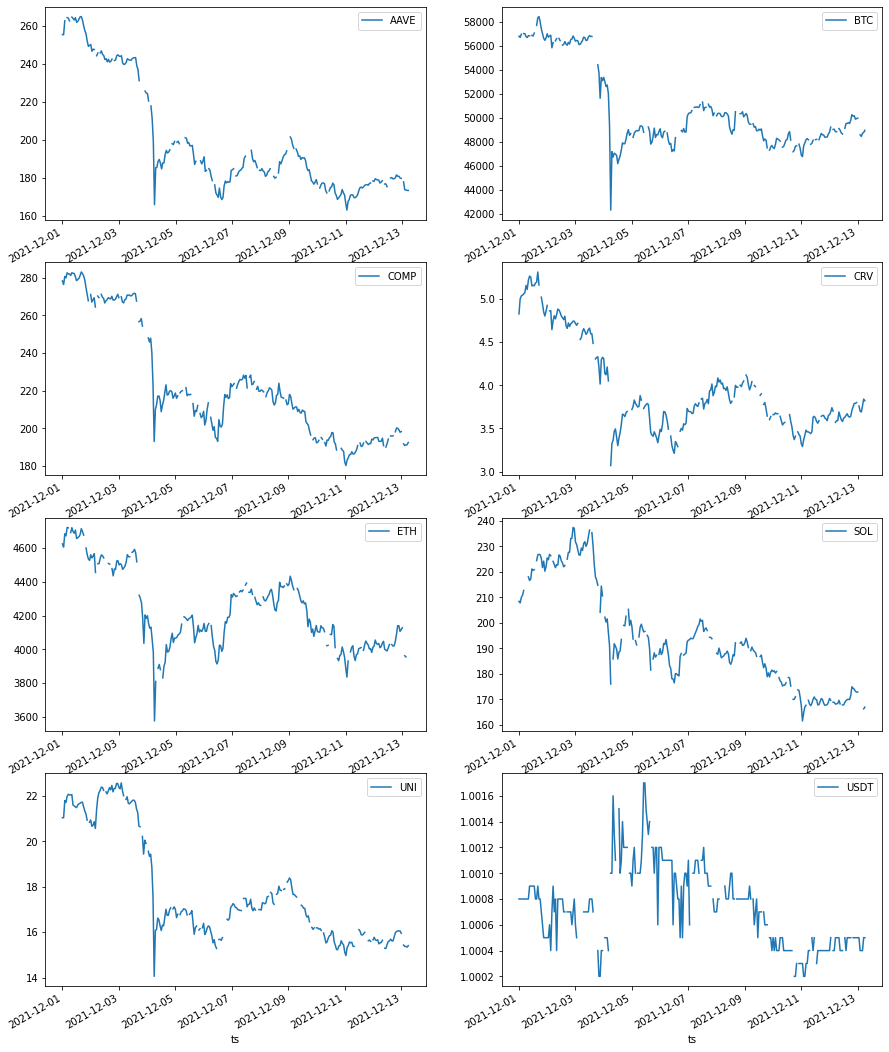

In [15]:
plot_price_change('low')

Since close price has too big value sometimes and open price looks reasonable, so we consider use this criteria to judge it and replace the original value to other value:
close price > 5 * open price or close price < 0.2 * open price;
Also, we could find close price looks like 100 times higher than open price or 0.01 times smaller than, so we consider using 100 * close price or 0.01 * close price to replace.

In [16]:
df.loc[(df['close'] > 5 * df['open']), 'close'] = df.loc[(df['close'] > 5 * df['open']), 'close'] / 100
df.loc[(df['close'] < 0.2 * df['open']), 'close'] = df.loc[(df['close'] < 0.2 * df['open']), 'close'] * 100

Look at the close price: 


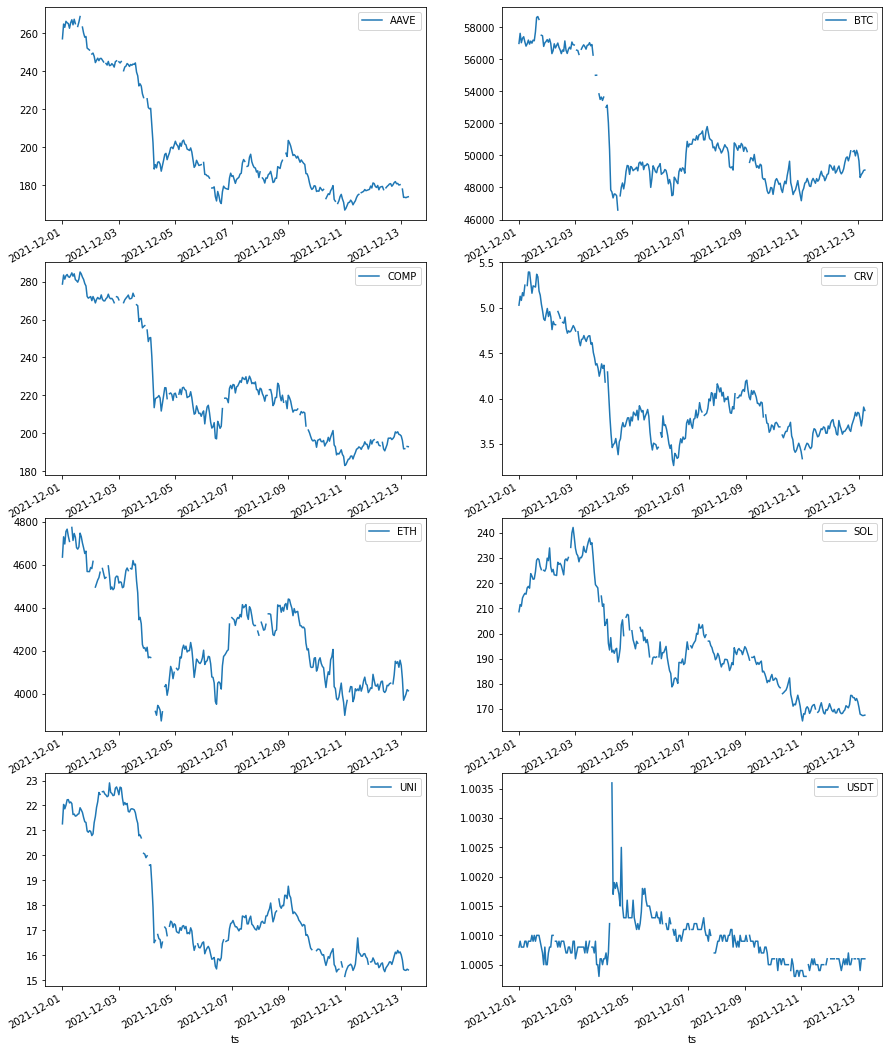

In [17]:
plot_price_change('close')

Now, the close price is much similar to real price. Then we consider the nan value.

In [18]:
df.isna().sum()

ts              0
open            0
high          450
low           256
close         116
volume          0
volumeUSD    2360
token           0
chain           0
dtype: int64

In [19]:
df.head(20)

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 23:00:00,245.542,245.986,244.668,NaN,465.868000,NaN,AAVE,ETH
1,2021-12-04 12:00:00,191.100,191.502,184.611,187.440,4854.272000,NaN,AAVE,ETH
2,2021-12-05 07:00:00,203.197,204.141,NaN,203.764,1483.325000,NaN,AAVE,ETH
3,2021-12-07 00:00:00,186.578,186.916,184.091,184.691,4172.479000,NaN,AAVE,ETH
4,2021-12-07 02:00:00,185.204,186.838,NaN,182.996,2527.875000,NaN,AAVE,ETH
5,2021-12-07 18:00:00,192.074,192.689,188.344,190.560,2590.975000,NaN,AAVE,ETH
6,2021-12-08 08:00:00,185.856,186.591,184.684,186.138,854.409000,NaN,AAVE,ETH
7,2021-12-08 14:00:00,183.925,185.682,NaN,183.693,1381.451000,NaN,AAVE,ETH
8,2021-12-08 15:00:00,183.556,NaN,182.520,189.833,5731.295000,NaN,AAVE,ETH
9,2021-12-10 04:00:00,179.150,179.180,177.180,178.000,1388.909000,NaN,AAVE,ETH


Since the distance between different time is quiet different, which means it is hard to use prices in one time to calculate prices in other time. So we consider this approach to compute nan in high, low, close:
1. If high, low is nan, using open price directly;
2. If close is nan, using (open + high + low) / 3.

In [20]:
df.loc[df['high'].isna(), 'high'] = df.loc[df['high'].isna(), 'open']
df.loc[df['low'].isna(), 'low'] = df.loc[df['low'].isna(), 'open']
df.loc[df['close'].isna(), 'close'] = (df.loc[df['close'].isna(), 'open'] + df.loc[df['close'].isna(), 'high'] + df.loc[df['close'].isna(), 'low']) / 3

In [21]:
df.isna().sum()

ts              0
open            0
high            0
low             0
close           0
volume          0
volumeUSD    2360
token           0
chain           0
dtype: int64

In [22]:
df.head(20)

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 23:00:00,245.542,245.986,244.668,245.398667,465.868000,NaN,AAVE,ETH
1,2021-12-04 12:00:00,191.100,191.502,184.611,187.440000,4854.272000,NaN,AAVE,ETH
2,2021-12-05 07:00:00,203.197,204.141,203.197,203.764000,1483.325000,NaN,AAVE,ETH
3,2021-12-07 00:00:00,186.578,186.916,184.091,184.691000,4172.479000,NaN,AAVE,ETH
4,2021-12-07 02:00:00,185.204,186.838,185.204,182.996000,2527.875000,NaN,AAVE,ETH
5,2021-12-07 18:00:00,192.074,192.689,188.344,190.560000,2590.975000,NaN,AAVE,ETH
6,2021-12-08 08:00:00,185.856,186.591,184.684,186.138000,854.409000,NaN,AAVE,ETH
7,2021-12-08 14:00:00,183.925,185.682,183.925,183.693000,1381.451000,NaN,AAVE,ETH
8,2021-12-08 15:00:00,183.556,183.556,182.520,189.833000,5731.295000,NaN,AAVE,ETH
9,2021-12-10 04:00:00,179.150,179.180,177.180,178.000000,1388.909000,NaN,AAVE,ETH


Look at the close price: 


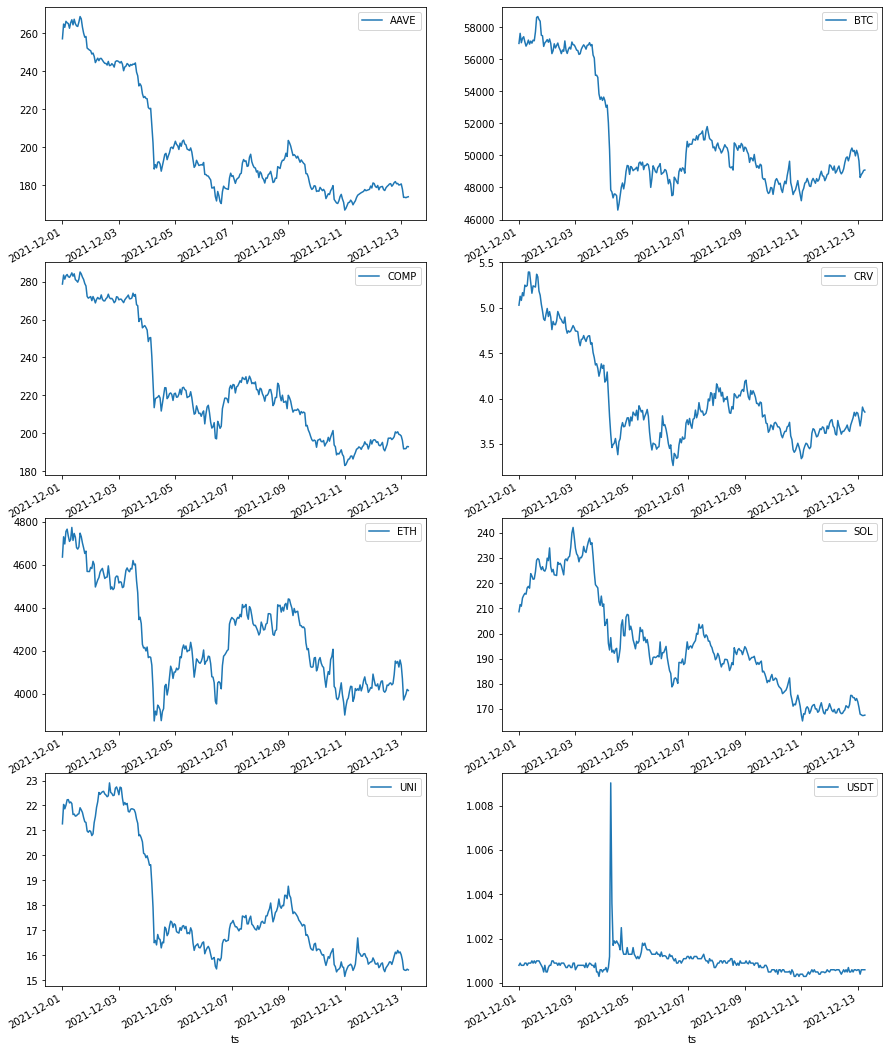

In [23]:
plot_price_change('close')

# Calculate volumeUSD by chain

In [24]:
df['volumeUSD'] = df['volume'] * df['close']

In [25]:
volumeusd_chain = df.groupby('chain')[['volumeUSD']].sum().sort_values('volumeUSD', ascending=False)
volumeusd_chain 

,volumeUSD
chain,
ETH,1.365489e+10
BTC,1.095944e+10
SOL,4.076438e+09
USDT,1.008117e+09
